In [49]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

## Vacuum state

Lowest energy Gaussian state. Has no displacement or squeezing in phase space.

Starting with one qumode, `q`

In [50]:
prog = sf.Program(1) # one qumode for our circcuit

In [51]:
with prog.context as q:
    Vac | q[0] # prepare the vacuum state on one qumode
    
# declare quantum circuit using the engine
eng = sf.Engine('gaussian')
state = eng.run(prog).state

In [52]:
print(state)

<GaussianState: num_modes=1, pure=True, hbar=2>


#### Plotting the Wigner funtion of the vacuum state.

It is a Gaussian distribution.
The Wigner function quasi-probability illustrates negative and positive regions in phase space.
Gaussian states, vacuum and squeezed state, are in +ve regions of the phase space, 
while non-Gaussian state can reach -ve regions of the phase space.
Y-axis reps the $\hat{P}$ quadrature or momentum operator, X-axis reps the $\hat{X}$ quadrature or position operator of the state.

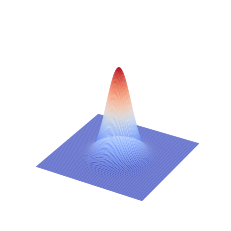

In [53]:
fig = plt.figure()

X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)

Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)

ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap=cm.coolwarm, lw=0.5, rstride=1, cstride=1, linewidth=0, antialiased=True) #cmap="RdYlGn"


#fig.set_size_inches(4.8, 5)
ax.set_axis_off()
plt.savefig("vacuum.png", dpi=1080, transparent=True, bbox_inches='tight', pad_inches=0)

##### Observations

- Has +ve quasi-probability everywhere.
- Centered at 0 on both position $\hat{X}$ and momentum $\hat{P}$ axes